In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats

In [4]:
sys.path.append('../External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax   # Useful functions to print fit results on figure

In [20]:
Chi2Regression?

In [41]:
length_ruler = np.array([5.322, 5.328, 5.327, 5.325])
length_laser = np.array([5.331, 5.332, 5.328, 5.329])

In [50]:
length_ruler_mean = np.mean(length_ruler)
length_laser_mean = np.mean(length_laser)
sigma_ruler = np.sqrt(np.sum((length_ruler-length_ruler_mean)**2)/(len(length_ruler)-1))
sigma_laser = np.sqrt(np.sum((length_laser-length_laser_mean)**2)/(len(length_laser)-1))

In [60]:
length_w_mean = (length_ruler_mean/(sigma_ruler**2) + length_laser_mean/(sigma_laser**2))/(1/(sigma_ruler**2) 
                                                                                           + 1/(sigma_laser**2))
length_sigma = np.sqrt(1/(1/(sigma_ruler**2) + 1/(sigma_laser**2)))

In [59]:
print(f"length of the pendulum measured by the ruler is: {length_ruler_mean:.5f} +/- {sigma_ruler:.5f}")
print(f"length of the pendulum measured by the laser is: {length_laser_mean:.5f} +/- {sigma_laser:.5f}")
print(f"length of the pendulum weigted is: {length_w_mean:.5f} +/- {length_sigma:.5f}")

length of the pendulum measured by the ruler is: 5.32550 +/- 0.00265
length of the pendulum measured by the laser is: 5.33000 +/- 0.00183
length of the pendulum weigted is: 5.32855 +/- 0.00150


In [9]:
data_bob = np.genfromtxt('data_Bob_pendulum14m_25measurements.dat.txt')
data_alice = np.genfromtxt('data_Alice_pendulum14m_25measurements.dat.txt')

In [21]:
period_bob = data_bob[:, 1]
period_alice = data_alice[:, 1]
numbers = data_bob[:, 0]
print(period_bob)

[  7.3827  15.0903  22.2372  29.862   37.5906  45.1035  52.647   60.0314
  67.7637  75.0191  82.53    90.1929  97.3683 105.1764 112.5806 120.0969
 127.574  135.1111 142.6312 150.2938 157.8051 165.2984 172.844  180.2411
 187.7204]


In [19]:
def lin_func(x, a, b):
    f = a * x + b
    return f

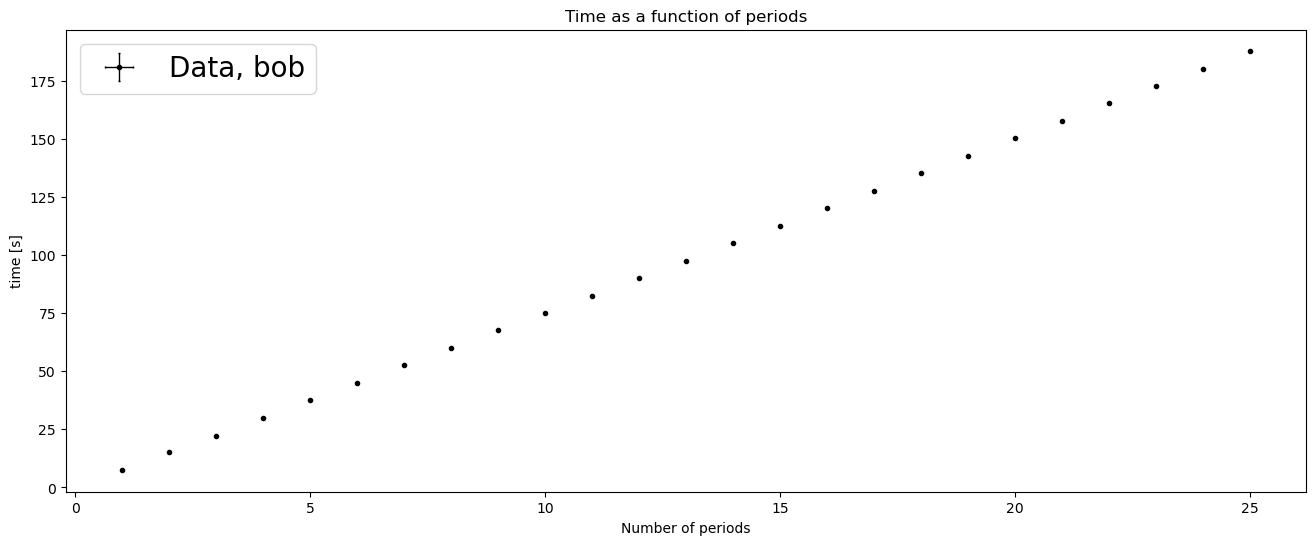

In [35]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.errorbar(x = numbers, y = period_bob, yerr= 0.2, xerr=0.0, label='Data, bob', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

ax.set(xlabel="Number of periods",           # the label of the y axis
       ylabel="time [s]",           # the label of the y axis
       title ="Time as a function of periods")    # the title of the plot
ax.legend(loc='best', fontsize=20);       # could also be # loc = 'upper right' e.g.

In [36]:
Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)

chi2fit = Chi2Regression(lin_func, x = numbers, y = period_bob, sy = 0.1)

minuit_chi2 = Minuit(chi2fit, a = 7.5, b = 0)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 29.6                       │              Nfcn = 36               │
│ EDM = 5.53e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  7.5143   │  0.0028   │            │            │         │         │       │
│ 1 │ b    │   -0.08   │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 7.69e-06  -100e-6 │
│ b │  -100e-6   0.0017 │
└───┴───────────────────┘

In [37]:
# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_a, fit_b = minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
Ndof_value = len(period_bob) - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")

Fit value: a = 7.51432 +/- 0.00277
Fit value: b = -0.07851 +/- 0.04123
Chi2 value: 29.6   Ndof = 23    Prob(Chi2,Ndof) = 0.161


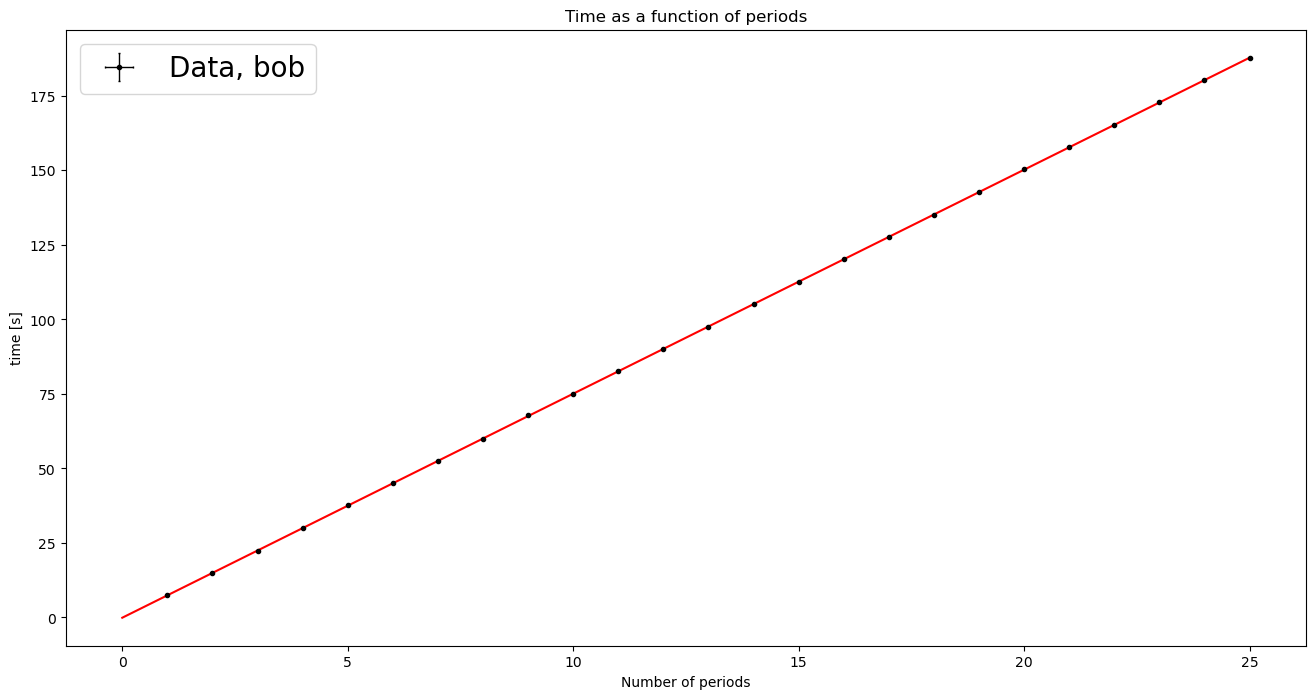

In [38]:
fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
ax.errorbar(x = numbers, y = period_bob, yerr= 0.01, xerr=0.0, label='Data, bob', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

ax.set(xlabel="Number of periods",           # the label of the y axis
       ylabel="time [s]",           # the label of the y axis
       title ="Time as a function of periods")    # the title of the plot
ax.legend(loc='best', fontsize=20);       # could also be # loc = 'upper right' e.g.

x_axis = np.linspace(0, 25, 1000)
ax.plot(x_axis, lin_func(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 


In [52]:
rn = np.random.uniform()

In [55]:
#Now we can calculate g and the errors
g_ruler = 4 * np.pi**2 * length_ruler_mean / (7.514**2)
g_uncertain_ruler = np.sqrt(16*np.pi**4*sigma_ruler**2/(7.514**4))

In [56]:
print(f"g measured by the ruler is: {length_ruler_mean:.5f} +/- {sigma_ruler:.5f}")


3.723726232760607
